In [9]:
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

In [115]:
df_train = pd.read_csv('./houseprices/train.csv')
df_test  = pd.read_csv('./houseprices/test.csv')

In [4]:
#모델평가
#rmsle : 예측값과 실제값에 로그를 씌워 그 차이를 비교.


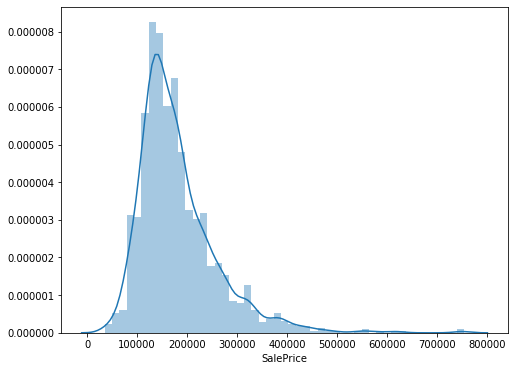

In [5]:
#target 시각화
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['SalePrice'])

In [6]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000191DE35DB88>,
      dtype=object)

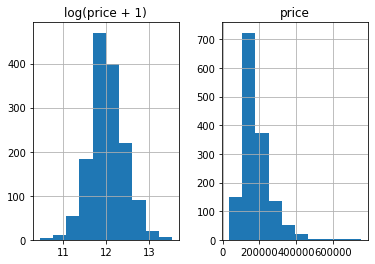

In [12]:
prices = pd.DataFrame({"price":df_train["SalePrice"], "log(price + 1)":np.log1p(df_train["SalePrice"])})
prices.hist()

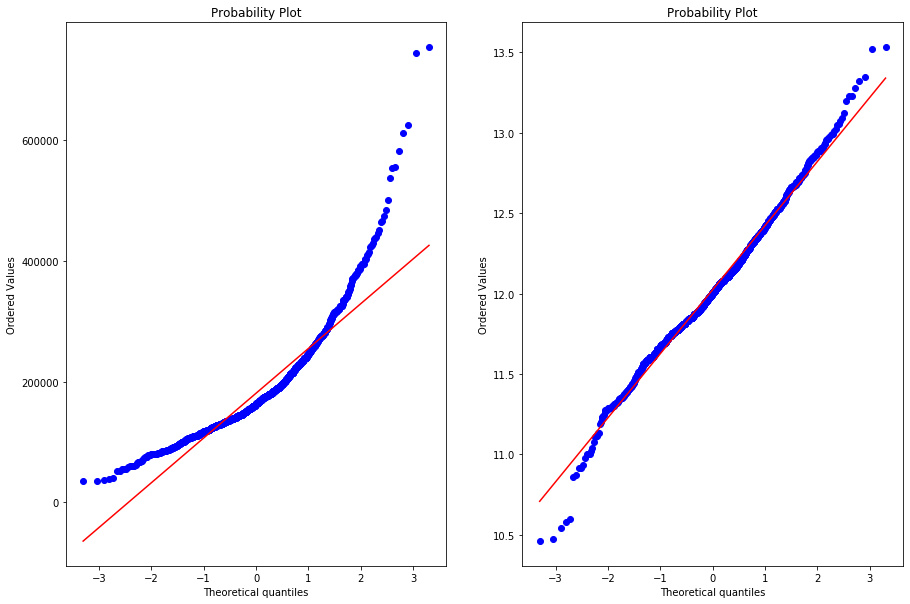

In [13]:
fig = plt.figure(figsize = (15,10))

fig.add_subplot(1,2,1)
res = stats.probplot(df_train['SalePrice'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(df_train['SalePrice']), plot=plt)

In [29]:
target_log = np.log1p(df_train['SalePrice'])
target_log.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [116]:
df_train_num = df_train.select_dtypes(include=[np.number])
df_train_obj = df_train.select_dtypes(include=[np.object])

df_test_num = df_test.select_dtypes(include=[np.number])
df_test_obj = df_test.select_dtypes(include=[np.object])

'\nOverallQual : Overall material and finish quality\nGrLivArea : Above grade (ground : the portion of a home that is above the ground) living area square feet\nGarageCars : Size of garage in car capacity\nGarageArea : Size of garage in square feet\nTotalBsmtSF : Total square feet of basement area (지하실 the lowermost portion of a structure partly or wholly below ground level; often used for storage)\n1stFlrSF : First Floor square feet\nFullBath : Full bathrooms above grade\nTotRmsAbvGrd : Total rooms above grade (does not include bathrooms)\nYearBuilt : Original construction date\n'

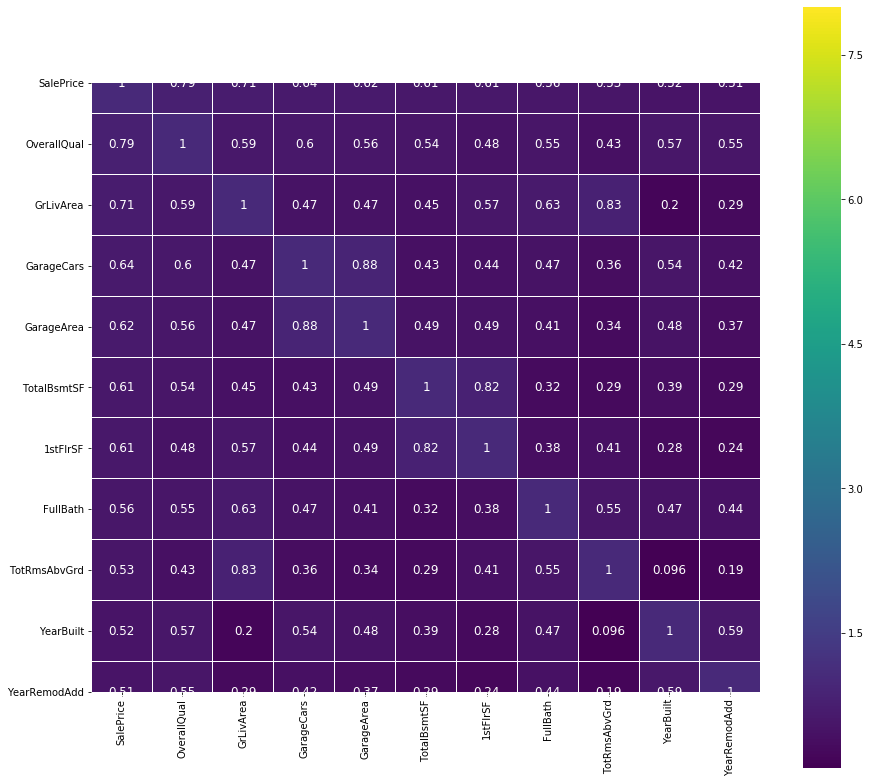

In [43]:
#saleprices와 높은 관계를 가진 feature보기.
f,ax=plt.subplots(figsize=(15,14))
correlation=df_train_num.corr() #전체 각 feature간의 관계
correlation['SalePrice'].sort_values(ascending=False)
k=11
cols=correlation.nlargest(k,'SalePrice')['SalePrice'].index
cm=np.corrcoef(df_train[cols].values.T)
sns.heatmap(cm,vmax=8, linewidths=0.01, square=True,
           annot=True, cmap='viridis',
           linecolor='white', xticklabels=cols.values,
           annot_kws={'size':12}, yticklabels=cols.values)
#pearson : numeric값들과의 상관
#spearman : categorical한 변수에도 사용가능한 상관관계
'''
OverallQual : Overall material and finish quality
GrLivArea : Above grade (ground : the portion of a home that is above the ground) living area square feet
GarageCars : Size of garage in car capacity
GarageArea : Size of garage in square feet
TotalBsmtSF : Total square feet of basement area (지하실 the lowermost portion of a structure partly or wholly below ground level; often used for storage)
1stFlrSF : First Floor square feet
FullBath : Full bathrooms above grade
TotRmsAbvGrd : Total rooms above grade (does not include bathrooms)
YearBuilt : Original construction date
'''

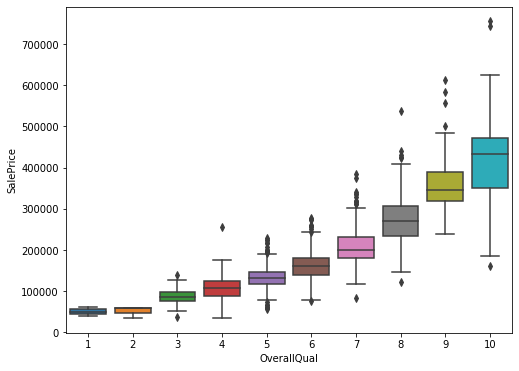

In [32]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
#집의 가치 -> 비례관계, 사분위수 외의 데이터들은 무엇인지 관찰할 필요

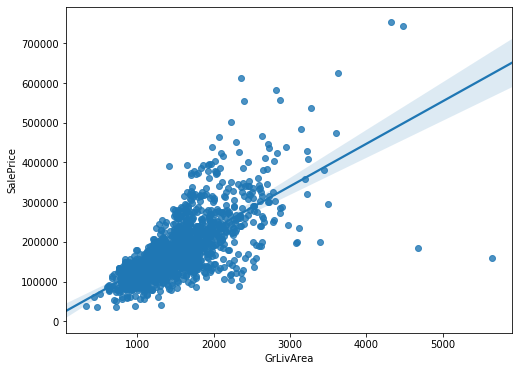

In [33]:
# GrLivArea
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='GrLivArea', y="SalePrice", data=data)
#거실의 크기에 따른 가격 분포. 대체로 증가

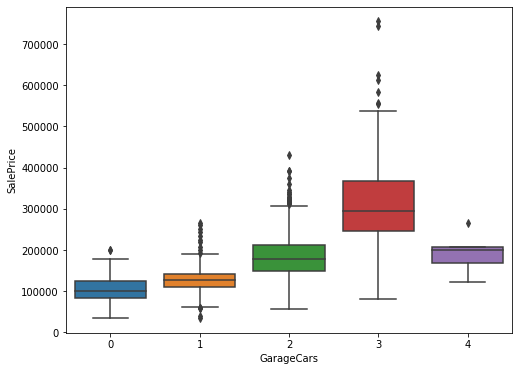

In [34]:
data = pd.concat([df_train['SalePrice'], df_train['GarageCars']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='GarageCars', y="SalePrice", data=data)
#증가하다가4에서 떨어짐.

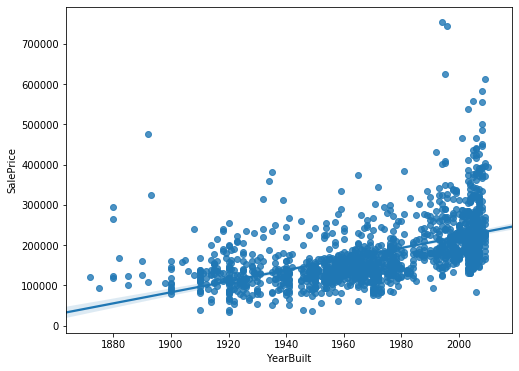

In [35]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='YearBuilt', y="SalePrice", data=data)
#지어진 년도.

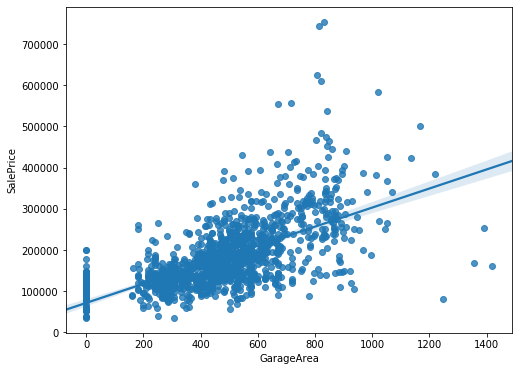

In [36]:
data = pd.concat([df_train['SalePrice'], df_train['GarageArea']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='GarageArea', y="SalePrice", data=data)
#차고 넓이, 대체로 증가/ 하지만 차고가 넓지만 가격이 낮은것도 있다.

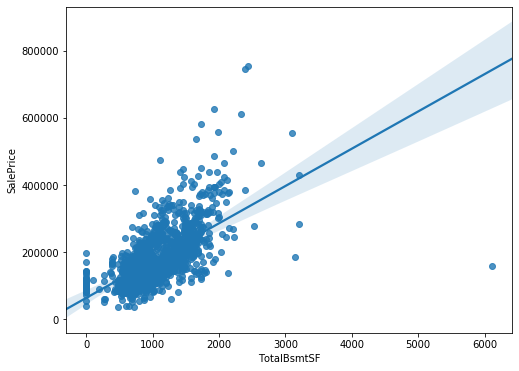

In [37]:
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='TotalBsmtSF', y="SalePrice", data=data)
#지하실의 크기? square feet, 비례하여 증가히지만 0인데 가격대가 다양한것이 있다.

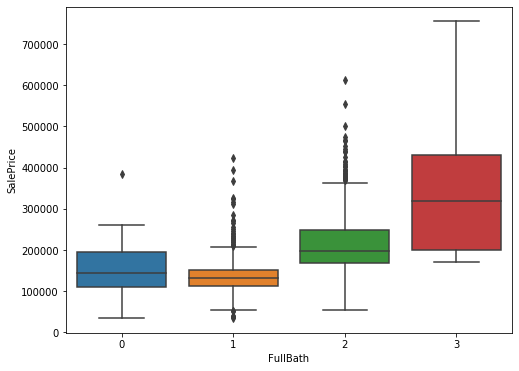

In [38]:
data = pd.concat([df_train['SalePrice'], df_train['FullBath']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='FullBath', y="SalePrice", data=data)
#욕실 갯수, 중간에 낮은게 잇는데 이는 hullbath가 아닌 halfbath가 있어서 그런듯.

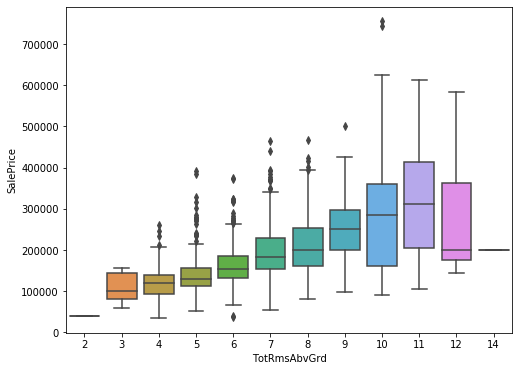

In [39]:
data = pd.concat([df_train['SalePrice'], df_train['TotRmsAbvGrd']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='TotRmsAbvGrd', y="SalePrice", data=data)
#가장 낮은데 6, 가장 높은게 10
#

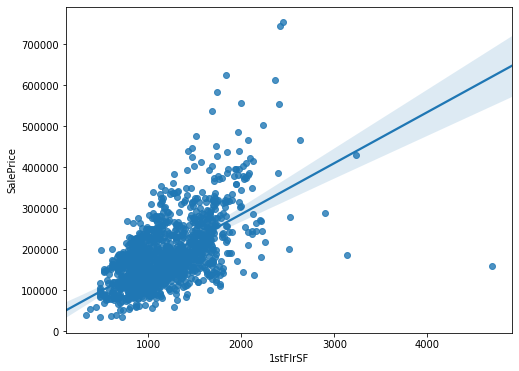

In [40]:
data = pd.concat([df_train['SalePrice'], df_train['1stFlrSF']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='1stFlrSF', y="SalePrice", data=data)
#1층 면적? 비례하여 증가.

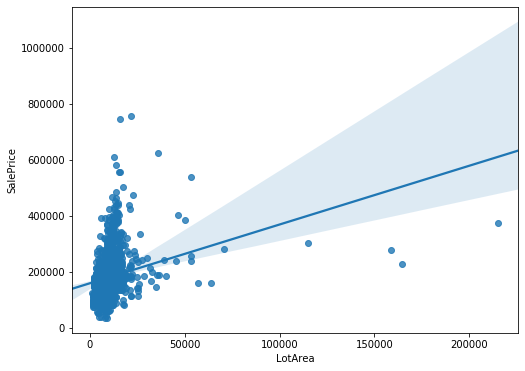

In [41]:
data = pd.concat([df_train['SalePrice'], df_train['LotArea']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='LotArea', y="SalePrice", data=data)

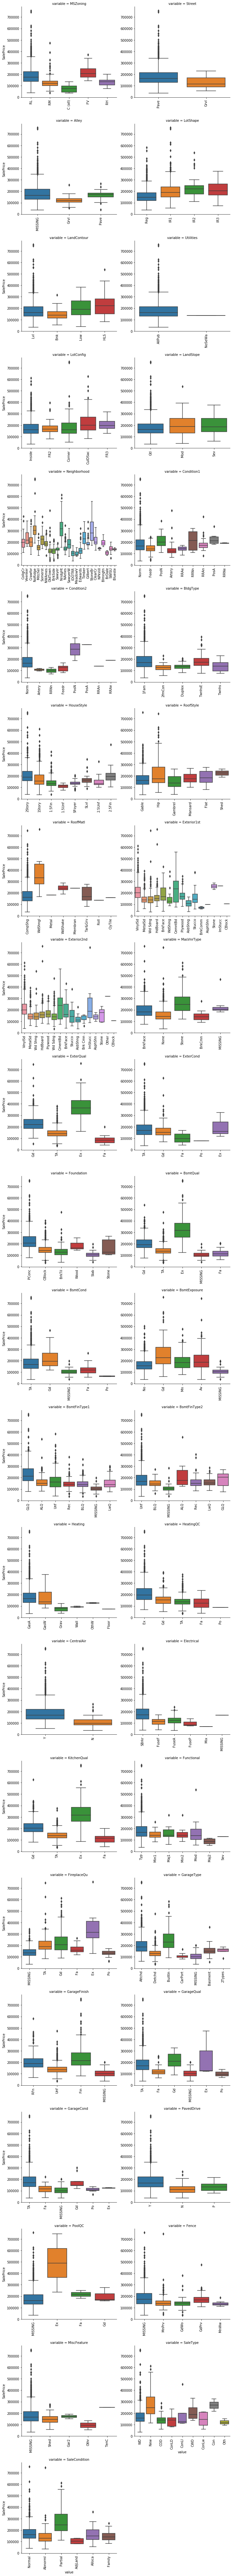

In [42]:
#cetegorical 변수 시각화.
for c in df_train_obj:
    df_train[c] = df_train[c].astype('category')
    if df_train[c].isnull().any():
        df_train[c] = df_train[c].cat.add_categories(['MISSING'])
        df_train[c] = df_train[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=df_train_obj)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

'''
Neighborhood, Condition1, Condition2와 같은 변수들은 각각의 값들끼리 중앙값의 차이가 크다. 
Condition1과 Condition2를 보면 Normal의 편차가 굉장히 큰게 이를 더 세분화 시킬 수 없을까 고민. 
Neighborhood를 보면 다른 범주형 변수들에 비해 이상치가 생기면 심하게 생기는 것을 확인할 수 있음. 왜 이렇게 생겼는지, 어떻게 대처해야할지 고민.
'''

Text(0.5, 1.0, 'Total Missing Value (%)')

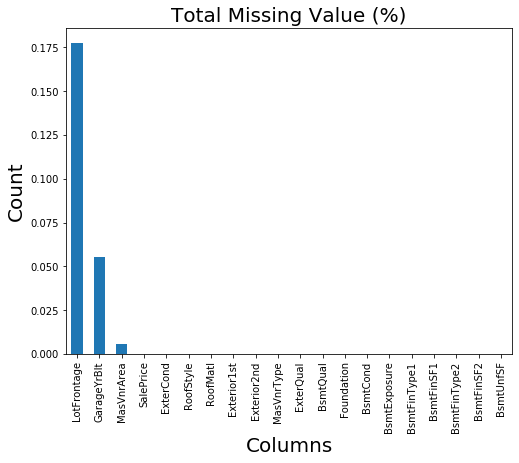

In [44]:
#null값들

total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

#histogram
#missing_data = missing_data.head(20)
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

In [46]:
#missing value
#null

total = df_train_num.isnull().sum().sort_values(ascending=False)
percent = (df_train_num.isnull().sum()/df_train_num.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'

missing_data.head(20)

Total Missing Count  % of Total Observations
 Numeric Feature                                              
LotFrontage                       259                 0.177397
GarageYrBlt                        81                 0.055479
MasVnrArea                          8                 0.005479
BsmtFinSF1                          0                 0.000000
LowQualFinSF                        0                 0.000000
2ndFlrSF                            0                 0.000000
1stFlrSF                            0                 0.000000
TotalBsmtSF                         0                 0.000000
BsmtUnfSF                           0                 0.000000
BsmtFinSF2                          0                 0.000000
SalePrice                           0                 0.000000
BsmtFullBath                        0                 0.000000
YearRemodAdd                        0                 0.000000
YearBuilt                           0                 0.000000
OverallCond                         0                 0.000000
OverallQual                         0                 0.000000
LotArea                             0                 0.000000
MSSubClass                          0                 0.000000
GrLivArea                           0                 0.000000
BsmtHalfBath                        0                 0.000000

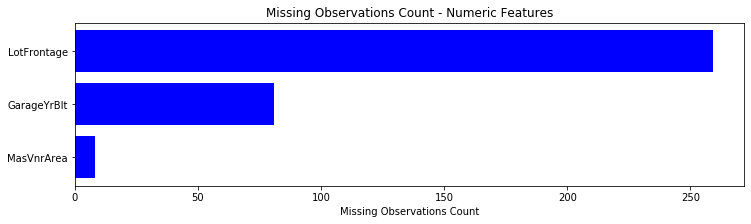

In [47]:
#bar로 어느정도인지 표현(null이 있는 것만)

missing_values = df_train_num.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,3))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

In [117]:
#categorical feature 중의 null

total = df_train_obj.isnull().sum().sort_values(ascending=False)
percent = (df_train_obj.isnull().sum()/df_train_obj.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data.head(20)

Total Missing Count   % of Total Observations
Feature                                                    
PoolQC                       1453                  0.995205
MiscFeature                  1406                  0.963014
Alley                        1369                  0.937671
Fence                        1179                  0.807534
FireplaceQu                   690                  0.472603
GarageCond                     81                  0.055479
GarageQual                     81                  0.055479
GarageFinish                   81                  0.055479
GarageType                     81                  0.055479
BsmtFinType2                   38                  0.026027
BsmtExposure                   38                  0.026027
BsmtFinType1                   37                  0.025342
BsmtQual                       37                  0.025342
BsmtCond                       37                  0.025342
MasVnrType                      8                  0.005479
Electrical                      1                  0.000685
Condition2                      0                  0.000000
Condition1                      0                  0.000000
Neighborhood                    0                  0.000000
LandSlope                       0                  0.000000

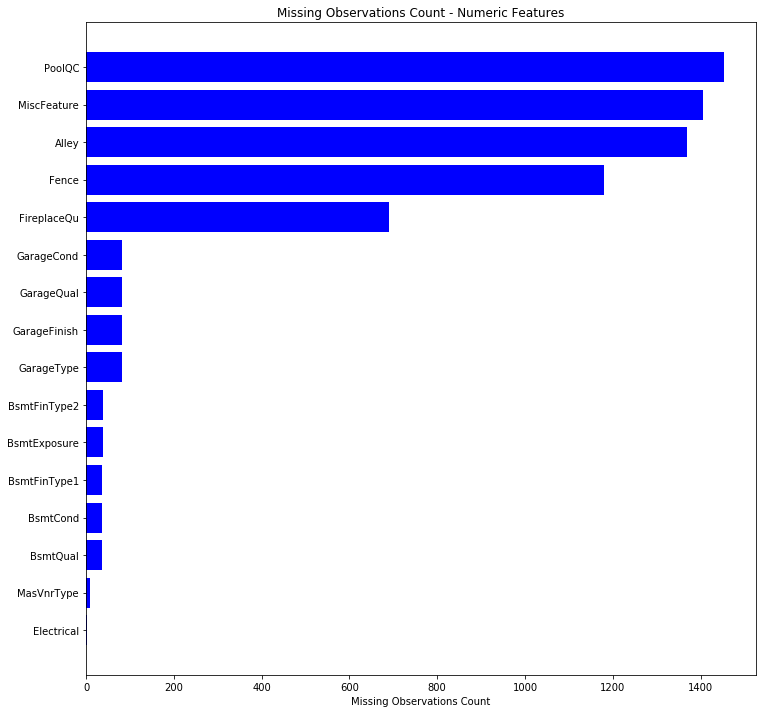

In [118]:
missing_values = df_train_obj.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,12))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

In [119]:
for column_name in df_train_obj.columns:
    print(column_name)
    df_train[column_name] = df_train[column_name].fillna(df_train[column_name].mode().iloc[0])
    unique_category = len(df_train[column_name].unique())
    print("Feature '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name,
                                                                             unique_category=unique_category))
for column_name in df_test_obj.columns:
    print(column_name)
    df_test[column_name] = df_test[column_name].fillna(df_test[column_name].mode().iloc[0])
    unique_category = len(df_test[column_name].unique())
    print("Feature '{column_name}' test has '{unique_category}' unique categories".format(column_name = column_name,
                                                                             unique_category=unique_category))


MSZoning
Feature 'MSZoning' has '5' unique categories
Street
Feature 'Street' has '2' unique categories
Alley
Feature 'Alley' has '2' unique categories
LotShape
Feature 'LotShape' has '4' unique categories
LandContour
Feature 'LandContour' has '4' unique categories
Utilities
Feature 'Utilities' has '2' unique categories
LotConfig
Feature 'LotConfig' has '5' unique categories
LandSlope
Feature 'LandSlope' has '3' unique categories
Neighborhood
Feature 'Neighborhood' has '25' unique categories
Condition1
Feature 'Condition1' has '9' unique categories
Condition2
Feature 'Condition2' has '8' unique categories
BldgType
Feature 'BldgType' has '5' unique categories
HouseStyle
Feature 'HouseStyle' has '8' unique categories
RoofStyle
Feature 'RoofStyle' has '6' unique categories
RoofMatl
Feature 'RoofMatl' has '8' unique categories
Exterior1st
Feature 'Exterior1st' has '15' unique categories
Exterior2nd
Feature 'Exterior2nd' has '16' unique categories
MasVnrType
Feature 'MasVnrType' has '4' uni

In [120]:
df_train_obj = df_train.select_dtypes(include=[np.object])
df_test_obj = df_test.select_dtypes(include=[np.object])

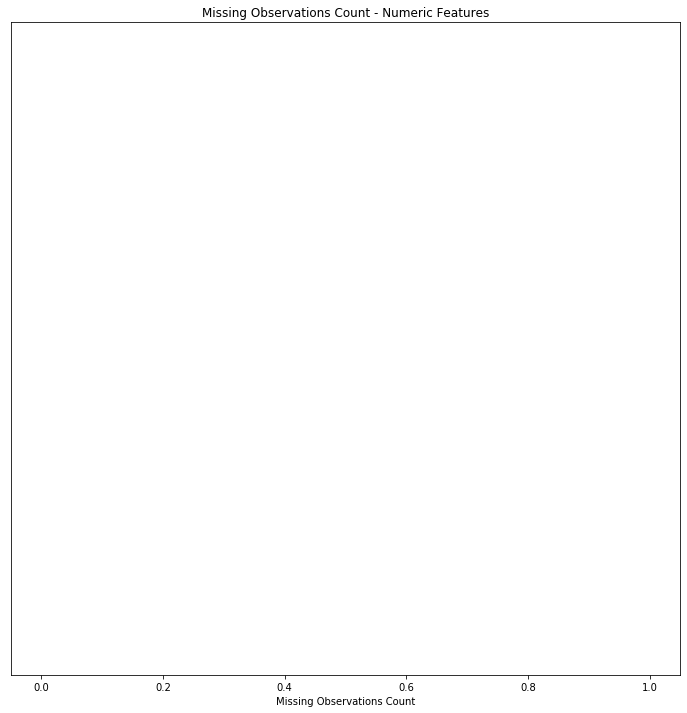

In [112]:
missing_values = df_train_obj.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,12))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

In [109]:
#전처리 
#위의 target_log로 target의 편차를 줄여놓음
target_log

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RH   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave  Grvl      IR1         Lvl    AllPub    Corner       Gtl   
2          RL   Pave  Grvl      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave  Grvl      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave  Grvl      IR1         HLS    AllPub    Inside       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1454       RM   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1455       RM   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Mod   

     Neighborhood Condition1  ... GarageType GarageFinish GarageQual  \
0           NAmes      Feedr  ...     Attchd          Unf         TA   
1           NAmes       Norm  ...     Attchd          Unf         TA   
2         Gilbert       Norm  ...     Attchd          Fin         TA   
3         Gilbert       Norm  ...     Attchd          Fin         TA   
4         StoneBr       Norm  ...     Attchd          RFn         TA   
...           ...        ...  ...        ...          ...        ...   
1454      MeadowV       Norm  ...     Attchd          Unf         TA   
1455      MeadowV       Norm  ...    CarPort          Unf         TA   
1456      Mitchel       Norm  ...     Detchd          Unf         TA   
1457      Mitchel       Norm  ...     Attchd          Unf         TA   
1458      Mitchel       Norm  ...     Attchd          Fin         TA   

     GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0            TA          Y     Ex  MnPrv        Shed       WD        Normal  
1            TA          Y     Ex  MnPrv        Gar2       WD        Normal  
2            TA          Y     Ex  MnPrv        Shed       WD        Normal  
3            TA          Y     Ex  MnPrv        Shed       WD        Normal  
4            TA          Y     Ex  MnPrv        Shed       WD        Normal  
...         ...        ...    ...    ...         ...      ...           ...  
1454         TA          Y     Ex  MnPrv        Shed       WD        Normal  
1455         TA          Y     Ex  MnPrv        Shed       WD       Abnorml  
1456         TA          Y     Ex  MnPrv        Shed       WD       Abnorml  
1457         TA          Y     Ex  MnPrv        Shed       WD        Normal  
1458         TA          Y     Ex  MnPrv        Shed       WD        Normal  

[1459 rows x 43 columns]

In [123]:
#인코딩 (categorical 변수) - one-hot-encoding
dummies = pd.get_dummies(df_train_obj, drop_first=True)
dummies_test=pd.get_dummies(df_test_obj, drop_first=True)

In [130]:
def find(x) :
    if x not in dummies_test.columns :
        return x
drop_train=list(filter(find,dummies.columns))
dummies=dummies.drop(drop_train,axis=1)
print(dummies.shape, dummies_test.shape)

(1460, 191) (1459, 191)


In [126]:
for col in df_train_num.columns :
    if df_train_num[col].isnull().sum() != 0 :
        print(f'{col} : {df_train[col].isnull().sum() / df_train[col].shape[0]}')
        print(df_train_num[col].describe()['mean'])
        print()
        df_train_num.loc[df_train_num[col].isnull()] = df_train_num[col].describe()['mean']

for col in df_test_num.columns :
    if df_test_num[col].isnull().sum() != 0 :
        print(f'{col} : {df_test[col].isnull().sum() / df_test[col].shape[0]}')
        print(df_test_num[col].describe()['mean'])
        print()
        df_test_num.loc[df_test_num[col].isnull()] = df_test_num[col].describe()['mean']

LotFrontage : 0.1773972602739726
70.04995836802665

MasVnrArea : 0.005479452054794521
96.88716589911867

GarageYrBlt : 0.05547945205479452
1613.643767830244

LotFrontage : 0.15558601782042494
68.58035714285714

MasVnrArea : 0.01028101439342015
93.04885433109686

BsmtFinSF1 : 0.0006854009595613434
366.7196697318719

BsmtFullBath : 0.0013708019191226869
11.98559543127743

GarageYrBlt : 0.053461274845784786
1646.8953706596258



(1459, 37)

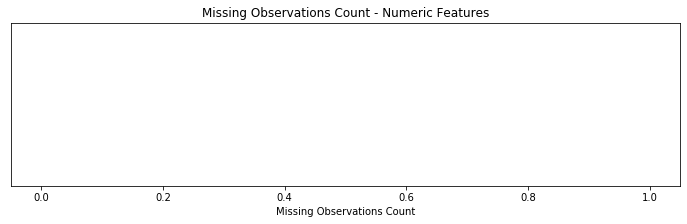

In [131]:
#bar로 어느정도인지 표현(null이 있는 것만)

missing_values = df_train_num.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,3))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

In [84]:
df_train_num.shape

(1460, 38)

In [132]:
s= df_train_num.skew()
s=s[s>0.75]
s=s.index
df_train_num[s] = np.log1p(df_train_num[s])

In [133]:
df_train_num.head()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0  1.0    4.110874     4.189655  9.042040     2.079442     1.791759   
1  2.0    3.044522     4.394449  9.169623     1.945910     2.197225   
2  3.0    4.110874     4.234107  9.328212     2.079442     1.791759   
3  4.0    4.262680     4.110874  9.164401     2.079442     1.791759   
4  5.0    4.110874     4.442651  9.565284     2.197225     1.791759   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0     2003.0        2003.0    5.283204    6.561031  ...    0.000000   
1     1976.0        1976.0    0.000000    6.886532  ...    5.700444   
2     2001.0        2002.0    5.093750    6.188264  ...    0.000000   
3     1915.0        1970.0    0.000000    5.379897  ...    0.000000   
4     2000.0        2000.0    5.860786    6.486161  ...    5.262690   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0     4.127134       0.000000        0.0          0.0       0.0      0.0   
1     0.000000       0.000000        0.0          0.0       0.0      0.0   
2     3.761200       0.000000        0.0          0.0       0.0      0.0   
3     3.583519       5.609472        0.0          0.0       0.0      0.0   
4     4.442651       0.000000        0.0          0.0       0.0      0.0   

     MoSold  YrSold  SalePrice  
0  1.098612  2008.0  12.247699  
1  1.791759  2007.0  12.109016  
2  2.302585  2008.0  12.317171  
3  1.098612  2006.0  11.849405  
4  2.564949  2008.0  12.429220  

[5 rows x 38 columns]

In [134]:
s= df_test_num.skew()
s=s[s>0.75]
s=s.index
df_test_num[s] = np.log1p(df_test_num[s])

In [135]:
df_test_num.head()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0  1461.0    3.044522     4.394449  9.360741     1.791759     1.945910   
1  1462.0    3.044522     4.406719  9.565775     1.945910     1.945910   
2  1463.0    4.110874     4.317488  9.534668     1.791759     1.791759   
3  1464.0    4.110874     4.369448  9.208238     1.945910     1.945910   
4  1465.0    4.795791     3.784190  8.518392     2.197225     1.791759   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  \
0     1961.0        1961.0    0.000000    6.150603  ...    6.594413   
1     1958.0        1958.0    4.691348    6.828712  ...    5.746203   
2     1997.0        1998.0    0.000000    6.674561  ...    6.180017   
3     1998.0        1998.0    3.044522    6.401917  ...    6.154858   
4     1992.0        1992.0    0.000000    5.575949  ...    6.228511   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0    4.948760     0.000000            0.0        0.0     4.795791       0.0   
1    5.976351     3.610918            0.0        0.0     0.000000       0.0   
2    5.361292     3.555348            0.0        0.0     0.000000       0.0   
3    5.888878     3.610918            0.0        0.0     0.000000       0.0   
4    0.000000     4.418841            0.0        0.0     4.976734       0.0   

    MiscVal    MoSold  YrSold  
0  0.000000  1.945910  2010.0  
1  9.433564  1.945910  2010.0  
2  0.000000  1.386294  2010.0  
3  0.000000  1.945910  2010.0  
4  0.000000  0.693147  2010.0  

[5 rows x 37 columns]

In [136]:
df_train = pd.merge(dummies, df_train_num, left_index=True, right_index=True)
df_test=pd.merge(dummies_test, df_test_num, left_index=True, right_index=True)

In [172]:
# x_train=df_train.drop('SalePrice', axis=1).values
# target=target_log
# x_test=df_test.values
x_train=df_train.drop('SalePrice', axis=1)
x_test=df_test
target=target_log

In [104]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

x_tr,x_vld,y_tr,y_vld = train_test_split(x_train, target, test_size=0.3, random_state=2018)

In [173]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x_train, target, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [174]:
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

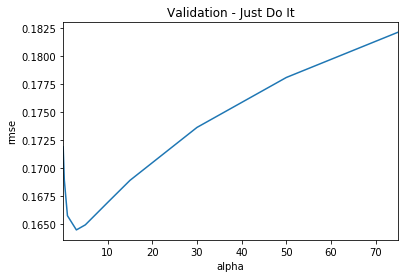

In [175]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [176]:
cv_ridge.min()

0.16449166838641677

In [177]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(x_train,target)

In [178]:
rmse_cv(model_lasso).mean()

0.1679541360073688

In [180]:
coef = pd.Series(model_lasso.coef_, index = x_train.columns)

In [181]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 133 variables and eliminated the other 95 variables


In [182]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

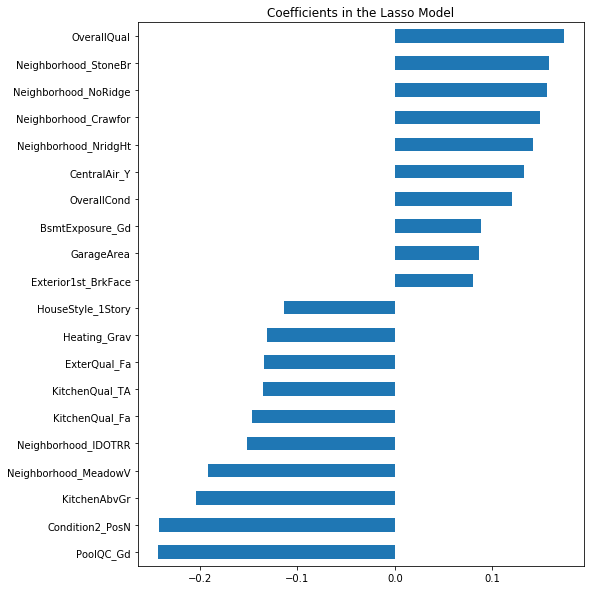

In [184]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

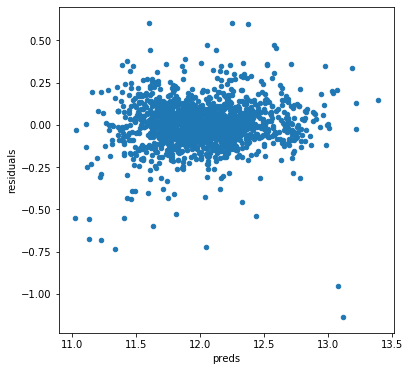

In [189]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(x_train), "true":target})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [191]:
prediction=model_lasso.predict(x_test)

In [193]:
result=np.expm1(prediction)

In [195]:
df_result=pd.read_csv('./houseprices/sample_submission.csv')
df_result['SalePrice'] = result
df_result.to_csv('./houseprices/sample_submission.csv', index=False)

In [196]:
df_result

Id      SalePrice
0     1461  163285.925853
1     1462  190058.324046
2     1463  226215.916371
3     1464  244080.197860
4     1465  254836.791547
...    ...            ...
1454  2915  111689.268474
1455  2916   98879.372187
1456  2917  178945.889184
1457  2918  146826.340111
1458  2919  266604.253388

[1459 rows x 2 columns]